# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import scipy.stats as stats
import seaborn as sns

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


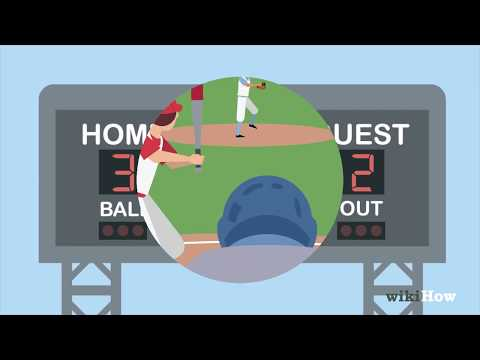

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [2]:
salaries = pd.read_csv('data/baseballdatabank-2023/contrib/Salaries.csv')
people = pd.read_csv('data/baseballdatabank-2023/core/People.csv')
pitching = pd.read_csv('data/baseballdatabank-2023/core/Pitching.csv')

In [3]:
salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [4]:
people

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20672,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20673,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20674,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [5]:
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50397,zastrro01,2022,1,NYN,NL,0,0,1,0,0,...,0.0,0,0.0,0,4.0,0,1,0.0,0.0,0.0
50398,zastrro01,2022,2,LAA,AL,0,0,5,0,0,...,0.0,1,0.0,0,12.0,1,3,0.0,0.0,0.0
50399,zerpaan01,2022,1,KCA,AL,2,1,3,2,0,...,0.0,1,0.0,0,44.0,0,3,0.0,0.0,1.0
50400,zeuchtj01,2022,1,CIN,NL,0,3,3,3,0,...,0.0,0,3.0,0,64.0,0,18,0.0,1.0,2.0


In [6]:
# Filter Salaries
salaries_dc1 = salaries.copy(deep=True)
salaries = salaries[salaries['yearID'] <= 2010]

# Filter Pitching
pitching_dc1 = pitching.copy(deep=True)
pitching = pitching[pitching['yearID'] <= 2010]

In [7]:
# Drop duplicates based on 'PlayerID' and 'yearID', keeping the first occurrence
salaries = salaries.drop_duplicates(subset=['playerID', 'yearID'], keep='first')

In [8]:
# Size of People Dataframe
people_size = people.shape  

# Size of Salaries Dataframe
salaries_size = salaries.shape

# Size of Pitching Dataframe
pitching_size = pitching.shape

print(people_size)
print(salaries_size)
print(pitching_size)

(20676, 24)
(21351, 5)
(40433, 30)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [10]:
# Get all unique values in the 'throws' column
unique_values = people['throws'].unique()
print(unique_values)

['R' 'L' nan 'S']


In [11]:
# Create a deep copy of the 'People' dataframe to avoid modifying the original
people_dc1 = people.copy(deep=True)

# Use boolean indexing to filter rows where 'throws' is either 'L' or 'R'
people = people[people['throws'].isin(['L', 'R'])]

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [22]:
# Merge the 'People' and 'Pitching' dataframes on the 'playerID' column
pitching_people = pitching
pitching_people = pitching_people.merge(people, how='left', on='playerID')

display(pitching_people.head)

<bound method NDFrame.head of         playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...  \
0      bechtge01    1871      1    PH1  NaN   1   2   3   3   2  ...   
1      brainas01    1871      1    WS3  NaN  12  15  30  30  30  ...   
2      fergubo01    1871      1    NY2  NaN   0   0   1   0   0  ...   
3      fishech01    1871      1    RC1  NaN   4  16  24  24  22  ...   
4      fleetfr01    1871      1    NY2  NaN   0   1   1   1   1  ...   
...          ...     ...    ...    ...  ...  ..  ..  ..  ..  ..  ...   
40428  zambrca01    2010      1    CHN   NL  11   6  36  20   0  ...   
40429  zieglbr01    2010      1    OAK   AL   3   7  64   0   0  ...   
40430  zimmejo02    2010      1    WAS   NL   1   2   7   7   0  ...   
40431   zitoba01    2010      1    SFN   NL   9  14  34  33   1  ...   
40432  zumayjo01    2010      1    DET   AL   2   1  31   0   0  ...   

         nameLast        nameGiven  weight  height  bats  throws       debut  \
0             NaN        

**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

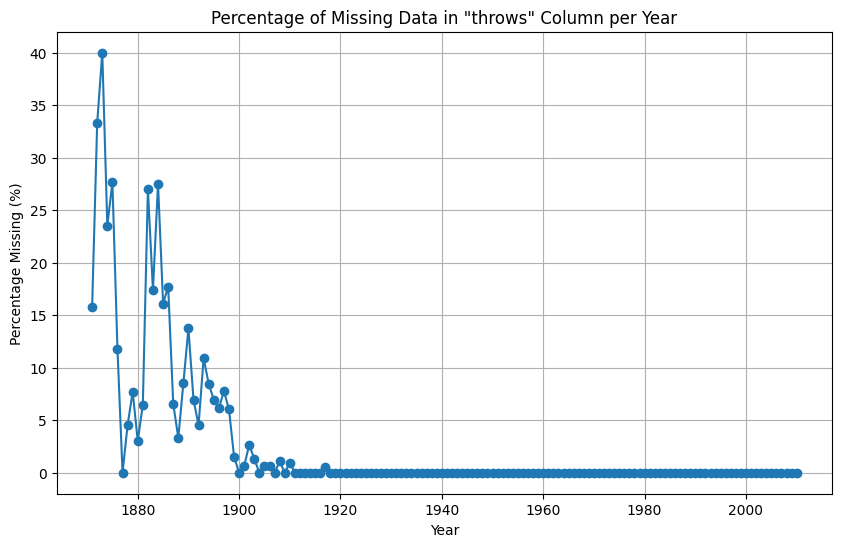

Percentage of Missing Data in 1892: 4.55%


In [23]:
# Calculate the percentage of missing data points per year
missing_percentage_per_year = (
    pitching_people.groupby('yearID')['throws']
    .apply(lambda x: (x.isnull().sum() / len(x)) * 100)
    .reset_index()
)

# Plot the missing data percentage per year
plt.figure(figsize=(10, 6))
plt.plot(missing_percentage_per_year['yearID'], missing_percentage_per_year['throws'], marker='o')
plt.title('Percentage of Missing Data in "throws" Column per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing (%)')
plt.grid(True)

# Show the plot
plt.show()

# Calculate and print the percentage of missing data in 1892
missing_percentage_1892 = (
    pitching_people[pitching_people['yearID'] == 1892]['throws'].isnull().sum() /
    len(pitching_people[pitching_people['yearID'] == 1892]['throws']) * 100
)
print(f"Percentage of Missing Data in 1892: {missing_percentage_1892:.2f}%")

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [24]:
# Filter 'Pitching-People' to contain data from 1920
pitching_people_dc = pitching_people.copy(deep=True)
pitching_people = pitching_people[pitching_people['yearID'] >= 1920]

# Filter 'Salaries' to contain data from 1920 
salaries_dc_2 = salaries.copy(deep=True)
salaries = salaries[salaries['yearID'] >= 1920]

In [30]:
display(pitching_people)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
6552,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Acosta,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01
6553,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Adams,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01
6554,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Alexander,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01
6555,altener01,1920,1,DET,AL,0,1,14,1,0,...,Alten,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01
6556,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Ayers,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


In [29]:
display(salaries)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [31]:
# Drop duplicates based on 'PlayerID' and 'yearID', keeping the first occurrence
salaries = salaries.drop_duplicates(subset=['playerID', 'yearID'], keep='first')

In [32]:
# Aggregate salary data by player (sum salaries for each player)
salaries = salaries.groupby('playerID')['salary'].sum().reset_index()
# Merge 'Pitching-People' and 'salaries' dataframes on 'playerID' column
Pitching_People_Salaries = pitching_people.merge(salaries[['playerID', 'salary']], how='left', on='playerID')

display(Pitching_People_Salaries)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,77075000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,815000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,79535000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


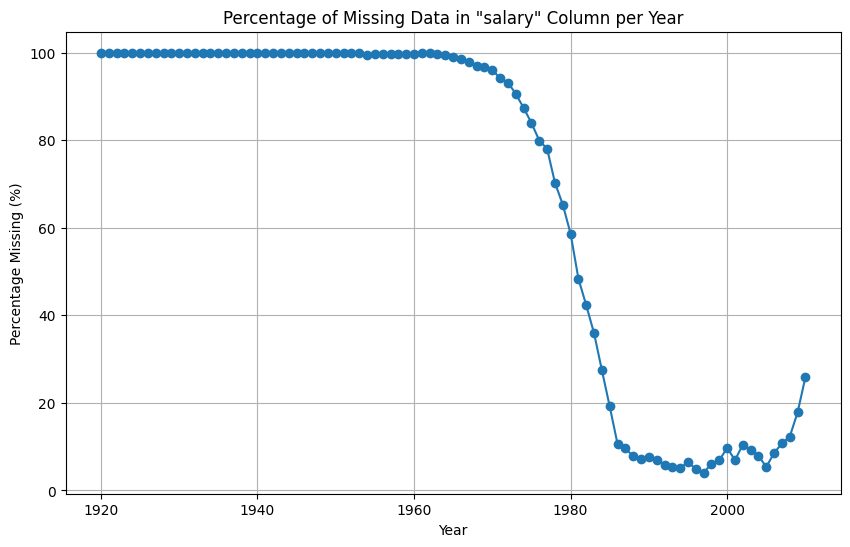

Percentage of Missing Data in 2002: 10.47%


In [33]:
# Calculate the percentage of missing data points per year
missing_percentage_per_year = (
    Pitching_People_Salaries.groupby('yearID')['salary']
    .apply(lambda x: (x.isnull().sum() / len(x)) * 100)
    .reset_index()
)

# Plot the missing data percentage per year
plt.figure(figsize=(10, 6))
plt.plot(missing_percentage_per_year['yearID'], missing_percentage_per_year['salary'], marker='o')
plt.title('Percentage of Missing Data in "salary" Column per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing (%)')
plt.grid(True)

# Show the plot
plt.show()

# Calculate and print the percentage of missing data in 2002
missing_percentage_2002 = (
    Pitching_People_Salaries[Pitching_People_Salaries['yearID'] == 2002]['salary'].isnull().sum() /
    len(Pitching_People_Salaries[Pitching_People_Salaries['yearID'] == 2002]['salary']) * 100
)
print(f"Percentage of Missing Data in 2002: {missing_percentage_2002:.2f}%")

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [34]:
years_with_salary_data = Pitching_People_Salaries.dropna(subset=['salary'])['yearID']
first_year = years_with_salary_data.min()
last_year = years_with_salary_data.max()

print(f"First Year with Salary Data: {first_year}")
print(f"Last Year with Salary Data: {last_year}")

# Filter the dataframe to include only data between the first and last year
filtered_Pitching_People_Salaries = Pitching_People_Salaries.copy(deep=True)
filtered_Pitching_People_Salaries = filtered_Pitching_People_Salaries[(filtered_Pitching_People_Salaries['yearID'] >= first_year) & (filtered_Pitching_People_Salaries['yearID'] <= last_year)]

# Print the resulting dataframe
display(filtered_Pitching_People_Salaries)

First Year with Salary Data: 1954
Last Year with Salary Data: 2010


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
7785,aberal01,1954,1,DET,AL,5,11,32,18,4,...,Albert Julius,195.0,74.0,L,L,1950-09-15,1957-09-11,abera101,aberal01,NaN
7786,antonjo02,1954,1,NY1,NL,21,7,39,37,18,...,John August,185.0,73.0,L,L,1948-07-04,1961-09-04,antoj103,antonjo02,NaN
7787,baczefr01,1954,1,CIN,NL,6,6,29,22,4,...,Frederic John,185.0,74.0,L,L,1953-04-26,1955-04-16,baczf101,baczefr01,NaN
7788,beardra01,1954,1,SLN,NL,0,4,13,10,0,...,Ralph William,200.0,77.0,R,R,1954-06-29,1954-09-09,bearr101,beardra01,NaN
7789,bickfve01,1954,1,BAL,AL,0,1,1,1,0,...,Vernon Edgell,180.0,72.0,R,R,1948-04-24,1954-04-24,bickv101,bickfve01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,77075000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,815000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,79535000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [35]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,beimejo01,2007,1,LAN,NL,4,2,83,0,0,...,Joseph Ronald,205.0,75.0,L,L,2001-04-08,2015-10-03,beimj001,beimejo01,912500.0
14982,wellsda01,2004,1,SDN,NL,12,8,31,31,0,...,David Lee,187.0,75.0,L,L,1987-06-30,2007-09-28,welld001,wellsda01,1250000.0
14983,ridgwje01,2007,1,TBA,AL,0,0,3,0,0,...,Jeffrey Allen,210.0,75.0,R,L,2007-09-17,2008-09-13,ridgj001,ridgwje01,NaN
14984,leiteal01,1994,1,TOR,AL,6,7,20,20,1,...,Alois Terry,200.0,74.0,L,L,1987-09-15,2005-10-02,leita001,leiteal01,565000.0


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

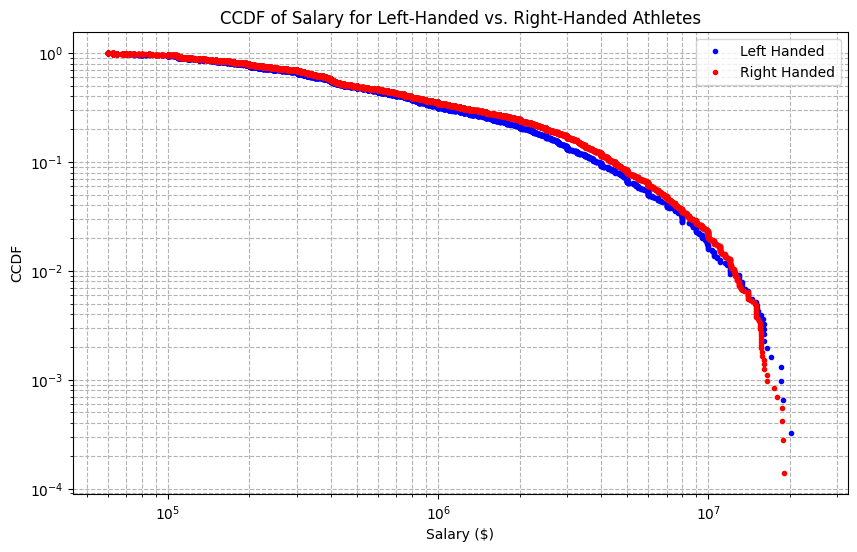

In [36]:
# Drop NaN values in salary column
df = df.dropna(subset=['salary'])

# Filter data for left-handed and right-handed players
left_handed = df[df['throws'] == 'L']['salary']
right_handed = df[df['throws'] == 'R']['salary']

# Define a function to compute CCDF
def compute_ccdf(data):
    sorted_data = np.sort(data)
    ccdf = 1 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, ccdf

# Compute CCDF for left-handed and right-handed players
lh_salary, lh_ccdf = compute_ccdf(left_handed)
rh_salary, rh_ccdf = compute_ccdf(right_handed)

# Plot the CCDF
plt.figure(figsize=(10,6))
plt.loglog(lh_salary, lh_ccdf, marker='.', linestyle='none', color='blue', label='Left Handed')
plt.loglog(rh_salary, rh_ccdf, marker='.', linestyle='none', color='red', label='Right Handed')
plt.legend()
plt.xlabel('Salary ($)')
plt.ylabel('CCDF')
plt.title('CCDF of Salary for Left-Handed vs. Right-Handed Athletes')
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

The issue with the plot is the presence of gaps at the tail end of the CCDF, especially noticeable for the right-handed athletes' salary data at the higher salary end. These discrete jumps represent salary values with very low frequencies, which makes them appear as individual points on a log-log scale. These gaps make it challenging to interpret the distribution, especially when trying to understand the proportion of athletes within specific salary ranges. This discrete representation can lead to misinterpretations, as it suggests that there are sudden drops in the distribution where, in reality, there might be a continuous decline.

Binning the Salaries: One solution is to use logarithmic binning, where the width of the bins increases exponentially. This will help in aggregating the salaries in a way that produces a smoother tail in the CCDF. The use of logarithmic bins ensures that we capture more detail in the range where the data is dense and less detail where it's sparse, which is suitable for a distribution that spans several orders of magnitude like the one in the plot.

**2.3 —** Implement the solution proposed by yourself in the previous question.

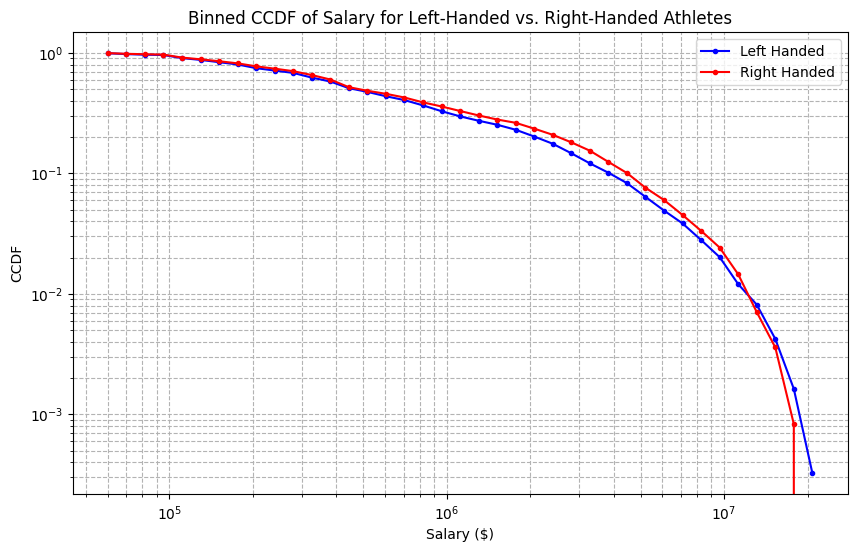

In [37]:
# Define logarithmic bins
log_min_salary = np.log10(min(min(lh_salary), min(rh_salary)))
log_max_salary = np.log10(max(max(lh_salary), max(rh_salary)))
bins = np.logspace(log_min_salary, log_max_salary, 40)  

# Bin the data
lh_counts, _ = np.histogram(left_handed, bins=bins)
rh_counts, _ = np.histogram(right_handed, bins=bins)

# Calculate the CCDF for binned data
lh_binned_ccdf = np.cumsum(lh_counts[::-1])[::-1] / len(left_handed)
rh_binned_ccdf = np.cumsum(rh_counts[::-1])[::-1] / len(right_handed)

# Plot the binned CCDF
plt.figure(figsize=(10,6))
plt.loglog(bins[:-1], lh_binned_ccdf, marker='.', linestyle='-', color='blue', label='Left Handed')
plt.loglog(bins[:-1], rh_binned_ccdf, marker='.', linestyle='-', color='red', label='Right Handed')
plt.legend()
plt.xlabel('Salary ($)')
plt.ylabel('CCDF')
plt.title('Binned CCDF of Salary for Left-Handed vs. Right-Handed Athletes')
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

Salary Estimates (Mean) for Left-Handed Pitchers: 1437232.861328125
Salary Estimates (Mean) for Right-Handed Pitchers: 1597010.1359545896

95% Confidence Interval for Left-Handed Pitchers: (1352631.0231361166, 1521834.6995201334)
95% Confidence Interval for Right-Handed Pitchers: (1539505.7752280608, 1654514.4966811184)


/tmp/ipykernel_40893/135169502.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x='Category', y='Mean Salary', color='b', label='Mean Salary', ci=None)


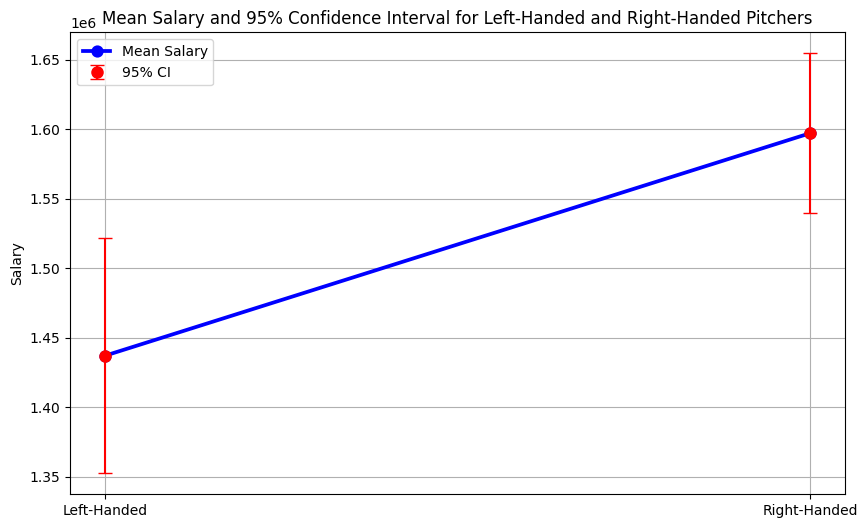

In [38]:
# Calculate the mean and standard error of the mean (SEM) for salary
left_handed_mean = left_handed.mean()
right_handed_mean = right_handed.mean()

left_handed_sem = stats.sem(left_handed, nan_policy='omit')
right_handed_sem = stats.sem(right_handed, nan_policy='omit')

# Calculate the 95% confidence interval
confidence_interval_left = stats.norm.interval(0.95, loc=left_handed_mean, scale=left_handed_sem)
confidence_interval_right = stats.norm.interval(0.95, loc=right_handed_mean, scale=right_handed_sem)

# Print the estimates
print("Salary Estimates (Mean) for Left-Handed Pitchers:", left_handed_mean)
print("Salary Estimates (Mean) for Right-Handed Pitchers:", right_handed_mean)
print("\n95% Confidence Interval for Left-Handed Pitchers:", confidence_interval_left)
print("95% Confidence Interval for Right-Handed Pitchers:", confidence_interval_right)

# Create a point plot for the estimates and confidence intervals
data = pd.DataFrame({
    'Category': ['Left-Handed', 'Right-Handed'],
    'Mean Salary': [left_handed_mean, right_handed_mean],
    'CI Lower': [confidence_interval_left[0], confidence_interval_right[0]],
    'CI Upper': [confidence_interval_left[1], confidence_interval_right[1]]
})

plt.figure(figsize=(10, 6))
sns.pointplot(data=data, x='Category', y='Mean Salary', color='b', label='Mean Salary', ci=None)
plt.errorbar(data=data, x='Category', y='Mean Salary', yerr=[data['Mean Salary'] - data['CI Lower'], data['CI Upper'] - data['Mean Salary']], fmt='o', markersize=8, color='r', capsize=5, label='95% CI')
plt.title('Mean Salary and 95% Confidence Interval for Left-Handed and Right-Handed Pitchers')
plt.ylabel('Salary')
plt.xlabel('')
plt.legend()
plt.grid(True)

plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

The two CIs do not overlap, which suggests a statistically significant difference in the salaries of Left-Handed and Right-Handed Pitchers.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [39]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(left_handed, right_handed, equal_var=False)

# Set the significance level
alpha = 0.05

# Determine the result of the t-test
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

# Determine who earns more based on the t-test result
if t_stat > 0:
    earnings_result = "left-handed pitchers earn more"
else:
    earnings_result = "right-handed pitchers earn more"

# Print the results
print("T-Test Result:", result)
print("Conclusion:", earnings_result)

T-Test Result: statistically significant
Conclusion: right-handed pitchers earn more


---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [40]:
# Filter the dataframe to include only rows with non-null batting average and games played values
df_filtered = df.dropna(subset=['BAOpp', 'G'])

# Separate the dataframe into left-handed and right-handed pitchers
left_handed = df_filtered[df_filtered['throws'] == 'L']
right_handed = df_filtered[df_filtered['throws'] == 'R']

# Filter pitchers who have played at least 5 games
left_handed = left_handed[left_handed['G'] >= 5]
right_handed = right_handed[right_handed['G'] >= 5]

# Calculate the mean opponents' batting average
mean_batting_avg_left_handed = left_handed['BAOpp'].mean()
mean_batting_avg_right_handed = right_handed['BAOpp'].mean()

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(left_handed['BAOpp'], right_handed['BAOpp'], equal_var=False)
print(t_stat, p_value)
# Set the significance level
alpha = 0.05

# Determine the result of the t-test
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

# Determine which group of pitchers is considered better
if mean_batting_avg_left_handed < mean_batting_avg_right_handed:
    better_pitchers = "left-handed pitchers"
else:
    better_pitchers = "right-handed pitchers"

# Print the results
print("Mean Opponents' Batting Average for Left-Handed Pitchers:", mean_batting_avg_left_handed)
print("Mean Opponents' Batting Average for Right-Handed Pitchers:", mean_batting_avg_right_handed)
print("\nT-Test Result:", result)
print("Conclusion:", better_pitchers, "are considered better pitchers.")

2.9866257227917816 0.002833850990641468
Mean Opponents' Batting Average for Left-Handed Pitchers: 0.2680601709401709
Mean Opponents' Batting Average for Right-Handed Pitchers: 0.265092157731502

T-Test Result: statistically significant
Conclusion: right-handed pitchers are considered better pitchers.


# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

In [41]:
df = pd.read_csv("./data/dataset-task-2.csv")

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [42]:
# Filter data for left-handed and right-handed players
df_filtered_task3 = df.copy(deep=True)
df_filtered_task3 = df_filtered_task3[df_filtered_task3['yearID'] >= 2000]
df_filtered_task3 = df_filtered_task3.dropna(subset=['BAOpp', 'G', 'salary', 'throws'])

# Separate the dataframe into left-handed and right-handed pitchers
left_handed = df_filtered_task3[df_filtered['throws'] == 'L']
right_handed = df_filtered_task3[df_filtered['throws'] == 'R']

/tmp/ipykernel_40893/2777474882.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  left_handed = df_filtered_task3[df_filtered['throws'] == 'L']
/tmp/ipykernel_40893/2777474882.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  right_handed = df_filtered_task3[df_filtered['throws'] == 'R']


In [43]:
left_handed

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
6,swindgr01,2001,1,ARI,NL,2,6,64,0,0,...,Forest Gregory,225.0,74.0,R,L,1986-08-21,2002-09-23,swing001,swindgr01,2533333.0
10,hendrma01,2007,1,LAN,NL,4,8,39,15,0,...,Mark Allan,240.0,81.0,L,L,2002-08-06,2011-08-28,hendm001,hendrma01,2925000.0
41,buehrma01,2007,1,CHA,AL,10,9,30,30,3,...,Mark Alan,240.0,74.0,L,L,2000-07-16,2015-10-04,buehm001,buehrma01,9500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,milletr02,2005,1,TBA,AL,2,2,61,0,0,...,Trever Douglas,200.0,75.0,R,L,1996-09-04,2011-09-24,millt002,milletr02,1100000.0
14958,beimejo01,2003,1,PIT,NL,1,3,69,0,0,...,Joseph Ronald,205.0,75.0,L,L,2001-04-08,2015-10-03,beimj001,beimejo01,322000.0
14969,glavito02,2008,1,ATL,NL,2,4,13,13,0,...,Thomas Michael,175.0,72.0,L,L,1987-08-17,2008-08-14,glavt001,glavito02,8000000.0
14981,beimejo01,2007,1,LAN,NL,4,2,83,0,0,...,Joseph Ronald,205.0,75.0,L,L,2001-04-08,2015-10-03,beimj001,beimejo01,912500.0


### Salaries

In [45]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(left_handed['salary'], right_handed['salary'], equal_var=False)

# Set the significance level
alpha = 0.05

# Determine the result of the t-test
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

# Determine who earns more based on the t-test result
if t_stat > 0:
    earnings_result = "left-handed pitchers earn more"
else:
    earnings_result = "right-handed pitchers earn more"

# Print the results
print(earnings_result)
print("T-Test Result:", result)

right-handed pitchers earn more
T-Test Result: not statistically significant


right-handed pitchers earn more but it is not statistically significant

### BAOpp

In [46]:
# Filter pitchers who have played at least 5 games
left_handed = left_handed[left_handed['G'] >= 5]
right_handed = right_handed[right_handed['G'] >= 5]

# Calculate the mean opponents' batting average
mean_batting_avg_left_handed = left_handed['BAOpp'].mean()
mean_batting_avg_right_handed = right_handed['BAOpp'].mean()

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(left_handed['BAOpp'], right_handed['BAOpp'], equal_var=False)
print(t_stat, p_value)
# Set the significance level
alpha = 0.05

# Determine the result of the t-test
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

# Determine which group of pitchers is considered better
if mean_batting_avg_left_handed < mean_batting_avg_right_handed:
    better_pitchers = "left-handed pitchers"
else:
    better_pitchers = "right-handed pitchers"

# Print the results
print("Mean Opponents' Batting Average for Left-Handed Pitchers:", mean_batting_avg_left_handed)
print("Mean Opponents' Batting Average for Right-Handed Pitchers:", mean_batting_avg_right_handed)
print("\nT-Test Result:", result)

0.9205964010142094 0.35736732942932503
Mean Opponents' Batting Average for Left-Handed Pitchers: 0.2678279569892473
Mean Opponents' Batting Average for Right-Handed Pitchers: 0.2663668486990042

T-Test Result: not statistically significant


**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

In [47]:
# Filter data for left-handed and right-handed players
df_filtered_task32 = df.copy(deep=True)
df_filtered_task32 = df_filtered_task32.dropna(subset=['BAOpp', 'G', 'salary', 'throws'])

In [48]:
# Separate the dataframe into left-handed and right-handed pitchers
left_handed = df_filtered_task32[df_filtered_task32['throws'] == 'L']
right_handed = df_filtered_task32[df_filtered_task32['throws'] == 'R']

In [49]:
left_handed

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
6,swindgr01,2001,1,ARI,NL,2,6,64,0,0,...,Forest Gregory,225.0,74.0,R,L,1986-08-21,2002-09-23,swing001,swindgr01,2533333.0
10,hendrma01,2007,1,LAN,NL,4,8,39,15,0,...,Mark Allan,240.0,81.0,L,L,2002-08-06,2011-08-28,hendm001,hendrma01,2925000.0
20,aldresc01,1993,2,MON,NL,1,0,3,0,0,...,Scott Phillip,195.0,76.0,L,L,1990-09-09,2000-05-29,aldrs001,aldresc01,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,schoupe01,1995,1,CIN,NL,18,7,29,29,2,...,Peter Alan,195.0,77.0,L,L,1991-04-09,2001-07-25,schop001,schoupe01,762778.0
14978,hurstbr01,1993,1,SDN,NL,0,1,2,2,0,...,Bruce Vee,200.0,76.0,L,L,1980-04-12,1994-06-18,hursb001,hurstbr01,3000000.0
14981,beimejo01,2007,1,LAN,NL,4,2,83,0,0,...,Joseph Ronald,205.0,75.0,L,L,2001-04-08,2015-10-03,beimj001,beimejo01,912500.0
14982,wellsda01,2004,1,SDN,NL,12,8,31,31,0,...,David Lee,187.0,75.0,L,L,1987-06-30,2007-09-28,welld001,wellsda01,1250000.0


In [50]:
per_year_left = left_handed.groupby('yearID')['playerID'].count()

In [51]:
per_year_right = right_handed.groupby('yearID')['playerID'].count()

In [52]:
# Find percentage of left-handed pitchers per year
per_year_left = left_handed.groupby('yearID')['playerID'].count()
per_year_right = right_handed.groupby('yearID')['playerID'].count()
A = per_year_left / (per_year_left + per_year_right)

# Find average salary of all pitchers per year
B = df_filtered_task32.groupby('yearID')['salary'].mean()

# Find average opponents' batting average of all pitchers per year
C = df_filtered_task32.groupby('yearID')['BAOpp'].mean()

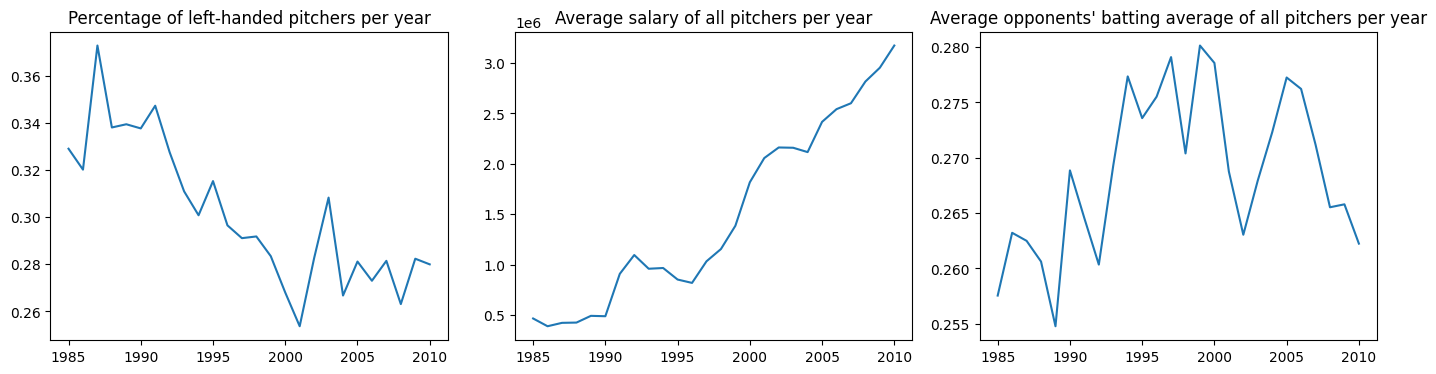

In [53]:
# Create a new figure with specified width and height
fig = plt.figure(figsize=(14, 4))

# Create Panel A
ax1 = fig.add_subplot(1, 3, 1)  
ax1.plot(A)  
ax1.set_title("Percentage of left-handed pitchers per year")

# Create Panel B
ax2 = fig.add_subplot(1, 3, 2)  
ax2.plot(B)  
ax2.set_title("Average salary of all pitchers per year")

# Create Panel C
ax3 = fig.add_subplot(1, 3, 3) 
ax3.plot(C) 
ax3.set_title("Average opponents' batting average of all pitchers per year")

# Display the plot
plt.tight_layout()
plt.show()

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

In [54]:
# Find average salary of left-handed and right-handed pitchers per year
AL = left_handed.groupby('yearID')['salary'].mean()
AR= right_handed.groupby('yearID')['salary'].mean()

# Find average opponents' batting average of left-handed and right-handed across the years
BL = left_handed.groupby('yearID')['BAOpp'].mean()
BR = right_handed.groupby('yearID')['BAOpp'].mean()

In [55]:
# Calculate the mean and standard error of the mean (SEM) for salary
left_handed_salary_mean = left_handed['salary'].mean()
right_handed_salary_mean = right_handed['salary'].mean()

left_handed_salary_sem = stats.sem(left_handed['salary'], nan_policy='omit')
right_handed_salary_sem = stats.sem(right_handed['salary'], nan_policy='omit')

# Calculate the 95% confidence interval
confidence_interval_salary_left = stats.norm.interval(0.95, loc=left_handed_salary_mean, scale=left_handed_salary_sem)
confidence_interval_salary_right = stats.norm.interval(0.95, loc=right_handed_salary_mean, scale=right_handed_salary_sem)

# Print the estimates
print("Salary Estimates (Mean) for Left-Handed Pitchers:", left_handed_salary_mean)
print("Salary Estimates (Mean) for Right-Handed Pitchers:", right_handed_salary_mean)
print("\n95% Confidence Interval for Left-Handed Pitchers:", confidence_interval_salary_left)
print("95% Confidence Interval for Right-Handed Pitchers:", confidence_interval_salary_right)

Salary Estimates (Mean) for Left-Handed Pitchers: 1436886.7958319765
Salary Estimates (Mean) for Right-Handed Pitchers: 1597198.5893104402

95% Confidence Interval for Left-Handed Pitchers: (1352260.1244149827, 1521513.4672489702)
95% Confidence Interval for Right-Handed Pitchers: (1539687.4520634478, 1654709.7265574327)


In [56]:
# Calculate the mean and standard error of the mean (SEM) for BAOpp
left_handed_BAOpp_mean = left_handed['BAOpp'].mean()
right_handed_BAOpp_mean = right_handed['BAOpp'].mean()

left_handed_BAOpp_sem = stats.sem(left_handed['BAOpp'], nan_policy='omit')
right_handed_BAOpp_sem = stats.sem(right_handed['BAOpp'], nan_policy='omit')

# Calculate the 95% confidence interval
confidence_interval_BAOpp_left = stats.norm.interval(0.95, loc=left_handed_BAOpp_mean, scale=left_handed_BAOpp_sem)
confidence_interval_BAOpp_right = stats.norm.interval(0.95, loc=right_handed_BAOpp_mean, scale=right_handed_BAOpp_sem)

# Print the estimates
print("BAOpp Estimates (Mean) for Left-Handed Pitchers:", left_handed_BAOpp_mean)
print("BAOpp Estimates (Mean) for Right-Handed Pitchers:", right_handed_BAOpp_mean)
print("\n95% Confidence Interval for BAOpp Left-Handed Pitchers:", confidence_interval_BAOpp_left)
print("95% Confidence Interval for BAOpp Right-Handed Pitchers:", confidence_interval_BAOpp_right)

BAOpp Estimates (Mean) for Left-Handed Pitchers: 0.27106219472484533
BAOpp Estimates (Mean) for Right-Handed Pitchers: 0.2688849349210745

95% Confidence Interval for BAOpp Left-Handed Pitchers: (0.2689631296876932, 0.27316125976199745)
95% Confidence Interval for BAOpp Right-Handed Pitchers: (0.26750563088603846, 0.27026423895611057)


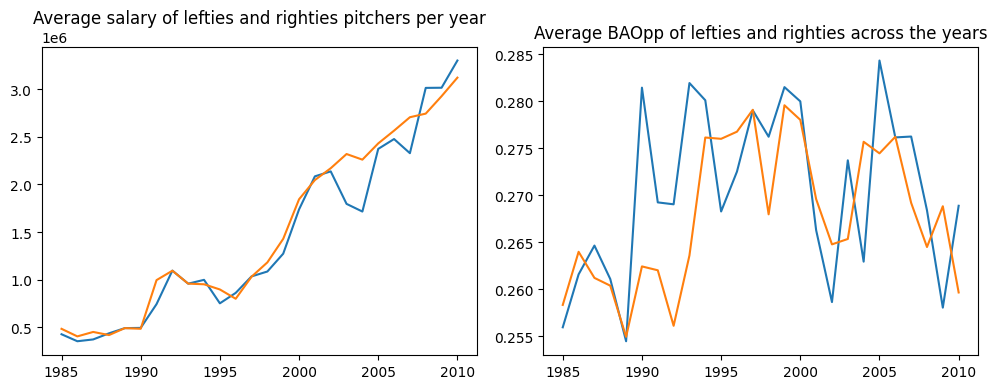

In [57]:
# Create a new figure with specified width and height
fig = plt.figure(figsize=(10, 4))

# Create Panel A
ax1 = fig.add_subplot(1, 2,1)  
ax1.plot(AL, label='L')  
ax1.plot(AR, label='R')  
ax1.set_title("Average salary of lefties and righties pitchers per year")

# Create Panel B
ax2 = fig.add_subplot(1, 2, 2)  
ax2.plot(BL, label='L')  
ax2.plot(BR, label='R')   
ax2.set_title("Average BAOpp of lefties and righties across the years")


# Display the plot
plt.tight_layout()
plt.show()

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?